In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# APL_Normalization图像结果

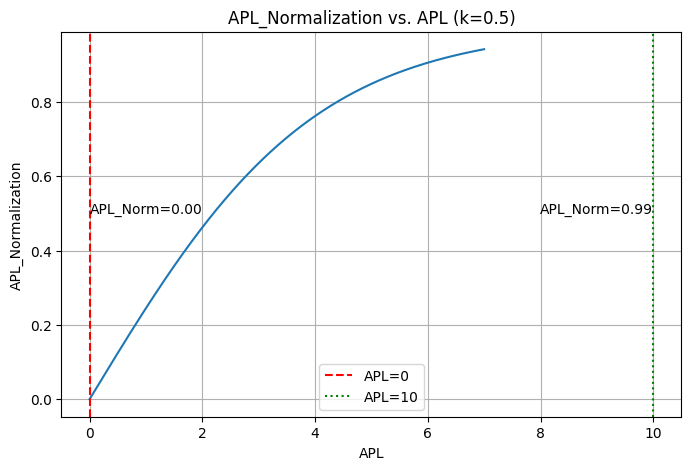

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义公式
def APL_Normalization(APL, k):
    return 1 - 2 / (1 + np.exp(k * APL))

# 设置k的值
k = 0.5  # 您可以根据需要调整这个值

# APL的取值范围
APL_values = np.linspace(0, 7, 1000)

# 计算APL_Normalization值
APL_Normalization_values = [APL_Normalization(apl, k) for apl in APL_values]

# 绘制图形
plt.figure(figsize=(8, 5))
plt.plot(APL_values, APL_Normalization_values)
plt.xlabel('APL')
plt.ylabel('APL_Normalization')
plt.title(f'APL_Normalization vs. APL (k={k})')

# 在APL = 0和APL = 9处使用不同类型的线段
plt.axvline(x=0, color='r', linestyle='--', label='APL=0')
plt.axvline(x=10, color='g', linestyle=':', label='APL=10')

# 在图中添加标签
# plt.text(0, 0.5, f'APL_Norm={APL_Normalization(0, k):.2f}', ha='right')
# plt.text(8, 0.5, f'APL_Norm={APL_Normalization(8, k):.2f}', ha='left')
plt.text(0, 0.5, f'APL_Norm={APL_Normalization(0, k):.2f}', ha='left')

plt.text(10, 0.5, f'APL_Norm={APL_Normalization(10, k):.2f}', ha='right')

plt.grid(True)
plt.legend()

# 保存图像为PNG文件
plt.savefig('APL_Normalization_plot.png', transparent=True)
plt.show()


# 实验表格，第一部分 交通整体位置

In [ ]:
#查看字体
import matplotlib.font_manager as fm

# 查找并打印出所有可用的字体名称
fonts = fm.findSystemFonts()
font_names = [fm.FontProperties(fname=font).get_name() for font in fonts]
print(set(font_names))


In [ ]:
#查看excel中的每个sheet
import pandas as pd
file_path = '/kaggle/input/transportation/4.1.xlsx'  # 替换为您的文件路径
excel_file = pd.ExcelFile(file_path)

sheet_names = excel_file.sheet_names
print("工作表名称:", sheet_names)

for sheet_name in sheet_names:
    print("\n工作表:", sheet_name)
    sheet_data = pd.read_excel(file_path, sheet_name=sheet_name)
    print(sheet_data.head())  # 打印每个工作表的前几行


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# Excel文件路径
file_path = '/kaggle/input/transportation/4.1.xlsx'

# 读取Excel文件
excel_data = pd.ExcelFile(file_path)

# 加载第一个工作表
first_sheet_name = excel_data.sheet_names[0]
first_sheet_data = pd.read_excel(file_path, sheet_name=first_sheet_name)

# 重命名第一列为'Category'以方便理解
first_sheet_data.rename(columns={first_sheet_data.columns[0]: 'Category'}, inplace=True)

# 设置字体属性
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'
myfont = fm.FontProperties(fname=font_path)

# 设置不同的线条样式和标记
line_styles = ['-', '--', '-.', ':']
markers = ['o', 's', '^', 'D']  # 圆形、方形、三角形、菱形

# 设置年份
years = list(range(2000, 2020))

# 翻译类别标签
translated_labels = {
    'World': '世界上游度',
    'CHN_APL_v': '中国上游度',
    'CHN_D_Transport_plv': '中国内资交通运输业上游度',
    'CHN_F_Transport_plv': '中国外资交通运输业上游度'
}

# 创建图表
plt.figure(figsize=(15, 8))

# 绘制每个类别
for (index, row), line_style, marker in zip(first_sheet_data.iterrows(), line_styles, markers):
    translated_label = translated_labels.get(row['Category'], row['Category'])
    plt.plot(years, row[1:], line_style, marker=marker, label=translated_label)

# 添加标题和标签
plt.title('2000-2019年交通运输领域前向平均传播长度趋势分析', fontproperties=myfont)
plt.xlabel('年份', fontproperties=myfont)
plt.ylabel('前向平均传播长度（APL）', fontproperties=myfont)

# 添加图例和网格
plt.legend(prop=myfont)
plt.grid(True, color='lightgray')
plt.xticks(years, rotation=45, fontproperties=myfont)  # 旋转x轴标签以便于阅读

# 保存图表为半透明图片
plt.savefig('/kaggle/working/2000-2019年交通运输领域前向平均传播长度趋势分析.png', format='png', transparent=True)  # 替换为您的图片保存路径

# 显示图表
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 设置文件路径
file_path = '/kaggle/input/transportation/4.1.xlsx'  # Excel文件路径
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'  # 字体文件路径

# 读取Excel文件
excel_data = pd.ExcelFile(file_path)

# 加载第二个工作表
second_sheet_name = excel_data.sheet_names[1]
second_sheet_data = pd.read_excel(file_path, sheet_name=second_sheet_name)

# 重命名第一个列为'Category'
second_sheet_data.rename(columns={second_sheet_data.columns[0]: 'Category'}, inplace=True)

# 设置字体属性
myfont = fm.FontProperties(fname=font_path)

# 翻译类别标签，并将'上游度'改为'下游度'，'前向'改为'后向'
translated_labels = {
    'World': '世界',
    'CHN_APL_y': '中国下游度',
    'CHN_D_Transport_ply': '中国内资交通运输业下游度',
    'CHN_F_Transport_ply': '中国外资交通运输业下游度'
}

# 定义年份和标记
years = list(range(2000, 2020))
markers = ['o', 's', '^', 'D']  # 圆形、方形、三角形、菱形

# 创建图表
plt.figure(figsize=(15, 8))
plt.grid(True, color='lightgray')

# 绘制每个类别，使用不同的标记
for (index, row), marker in zip(second_sheet_data.iterrows(), markers):
    translated_label = translated_labels.get(row['Category'], row['Category'])
    plt.plot(years, row[1:], marker=marker, linestyle='-', label=translated_label)

# 添加标题和标签
plt.title('2000-2019年交通运输领域后向平均传播长度趋势分析 (第二个工作表)', fontproperties=myfont)
plt.xlabel('年份', fontproperties=myfont)
plt.ylabel('平均传播长度（APL）', fontproperties=myfont)
plt.legend(prop=myfont)

# 保存图表为半透明图片
output_file_path = '/kaggle/working/2000-2019年交通运输领域后向平均传播长度趋势分析 (第二个工作表).png'
plt.savefig(output_file_path, format='png', transparent=True)

plt.show()

output_file_path


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# 设置字体路径
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'
font_prop = FontProperties(fname=font_path)

# 从新的路径加载Excel文件
file_path_kaggle = '/kaggle/input/transportation/4.1.xlsx'
excel_data_kaggle = pd.ExcelFile(file_path_kaggle)

# 加载第四个sheet到DataFrame
fourth_sheet_df_kaggle = pd.read_excel(file_path_kaggle, sheet_name='PLV各个运输sector')

# 数据预处理：将数据分为内资(D)和外资(F)企业
domestic_df_kaggle = fourth_sheet_df_kaggle[fourth_sheet_df_kaggle['plv'].str.contains('CHN_D')]
foreign_df_kaggle = fourth_sheet_df_kaggle[fourth_sheet_df_kaggle['plv'].str.contains('CHN_F')]

# 将数据整理为适合绘图的格式
domestic_melted_kaggle = domestic_df_kaggle.melt(id_vars=['plv'], var_name='Year', value_name='Value')
foreign_melted_kaggle = foreign_df_kaggle.melt(id_vars=['plv'], var_name='Year', value_name='Value')

# 为每个企业分配不同的标记
unique_markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', '+', 'x', 'D', 'h', 'H']
domestic_markers = {plv: unique_markers[i % len(unique_markers)] for i, plv in enumerate(domestic_melted_kaggle['plv'].unique())}
foreign_markers = {plv: unique_markers[i % len(unique_markers)] for i, plv in enumerate(foreign_melted_kaggle['plv'].unique())}

# 设置图表风格
sns.set(style="whitegrid")

# 创建子图
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# 为内资企业绘制带标记的线图
for plv, group in domestic_melted_kaggle.groupby('plv'):
    sns.lineplot(ax=axes[0], x='Year', y='Value', data=group, marker=domestic_markers[plv], label=plv)
axes[0].set_title('内资交通业上游度 (CHN_D)', fontproperties=font_prop)
axes[0].set_xlabel('年份', fontproperties=font_prop)
axes[0].set_ylabel('数值', fontproperties=font_prop)
axes[0].tick_params(axis='x', rotation=45)

# 为外资企业绘制带标记的线图
for plv, group in foreign_melted_kaggle.groupby('plv'):
    sns.lineplot(ax=axes[1], x='Year', y='Value', data=group, marker=foreign_markers[plv], label=plv)
axes[1].set_title('外资交通业上游度 (CHN_F)', fontproperties=font_prop)
axes[1].set_xlabel('年份', fontproperties=font_prop)
axes[1].set_ylabel('数值', fontproperties=font_prop)
axes[1].tick_params(axis='x', rotation=45)

# 调整布局并显示图表
plt.tight_layout()

# 保存图表到指定的输出路径
output_path = '/kaggle/working/domestic_foreign_enterprises.png'
plt.savefig(output_path, bbox_inches='tight')

plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# New file path and font path
new_file_path = '/kaggle/input/transportation/4.1.xlsx'
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'

# Load the data from the new file path
data_new = pd.read_excel(new_file_path, sheet_name=3)  # Assuming sheet 3 contains the relevant data
heatmap_data_new = data_new.set_index('plv')

# Load the custom font
prop = fm.FontProperties(fname=font_path)

# Plotting the heatmap with the custom font, Chinese labels, and smaller numerical annotations
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data_new, cmap='viridis', annot=True, fmt=".5f", 
            annot_kws={"size": 6})  # Adjust font size with annot_kws
plt.title('中国交通行业上游度热图 (2000至2019年)', fontproperties=prop)  # Title in Chinese
plt.xlabel('年份', fontproperties=prop)  # X-axis label in Chinese
plt.ylabel('行业编码', fontproperties=prop)  # Y-axis label in Chinese
plt.xticks(fontproperties=prop)
plt.yticks(fontproperties=prop)

# Save the figure to the specified location
output_file = '/kaggle/working/中国交通行业上游度热图 (2000至2019年).png'
plt.savefig(output_file)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# New file path and font path
new_file_path = '/kaggle/input/transportation/4.1.xlsx'
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'

# Load the data from the fifth sheet of the Excel file
sheet_name_5 = 4  # Sheets are 0-indexed, so the fifth sheet is index 4
data_sheet_5 = pd.read_excel(new_file_path, sheet_name=sheet_name_5)
heatmap_data_sheet_5 = data_sheet_5.set_index(data_sheet_5.columns[0])

# Load the custom font
prop = fm.FontProperties(fname=font_path)

# Plotting the heatmap for the fifth sheet with the custom font, Chinese labels, and smaller numerical annotations
plt.figure(figsize=(15, 10))
sns.heatmap(heatmap_data_sheet_5, cmap='viridis', annot=True, fmt=".5f", 
            annot_kws={"size": 6})  # Add annot=True, fmt, and annot_kws
plt.title('中国交通行业下游度热图 (2000至2019年)', fontproperties=prop)  # Title in Chinese
plt.xlabel('年份', fontproperties=prop)  # X-axis label in Chinese
plt.ylabel('行业编码', fontproperties=prop)  # Y-axis label in Chinese
plt.xticks(fontproperties=prop)
plt.yticks(fontproperties=prop)

# Save the figure to the specified location
output_file_sheet_5 = '/kaggle/working/中国交通行业下游度热图 (2000至2019年).png'
plt.savefig(output_file_sheet_5)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# Load the data from the second sheet of the Excel file
df = pd.read_excel('/kaggle/input/upload/.xlsx', sheet_name='均值整理后')
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'
prop = fm.FontProperties(fname=font_path)

# Create the plot
plt.figure(figsize=(20, 10))
industries = df['Industry'].unique()
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']

# Ensure enough markers for the industries
if len(markers) < len(industries):
    markers *= (len(industries) // len(markers) + 1)

# Plotting each industry with a different marker
for ind, marker in zip(industries, markers):
    industry_data = df[df['Industry'] == ind]
    plt.plot(industry_data.columns[1:], industry_data.values[0, 1:], marker=marker, color='black', label=ind, markersize=10, alpha=0.5)

plt.tick_params(axis='x', which='major', labelsize=11)  # 调整字体大小
plt.title('中国交通行业上游度与下游度分解', fontproperties=prop)
plt.xlabel('参数', fontproperties=prop)
plt.ylabel('数值', fontproperties=prop)
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Save the plot with semi-transparency
output_plot_path = '/kaggle/working/中国交通行业上游度与下游度分解结果.png'
plt.savefig(output_plot_path, transparent=True, bbox_inches='tight')
plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

# 设置文件路径
input_file_path = '/kaggle/input/upload/.xlsx'
output_plot_path = '/kaggle/working/parallel_coordinates_plot.png'

# 读取数据
df = pd.read_excel(input_file_path)

# 数据处理（例如计算行业平均值）
# ...

# 创建平行坐标图
plt.figure(figsize=(18, 10))  # 增大图表尺寸
parallel_coordinates(df, 'Industry', colormap=plt.get_cmap("Set2"))
plt.title('Parallel Coordinates Plot for Each Industry')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.xticks(rotation=65)  # 将标签角度调整为垂直
plt.tick_params(axis='x', which='major', labelsize=9)  # 调整字体大小

# 保存图表
plt.savefig(output_plot_path, bbox_inches='tight')


/kaggle/working/行业各分解参数趋势.png


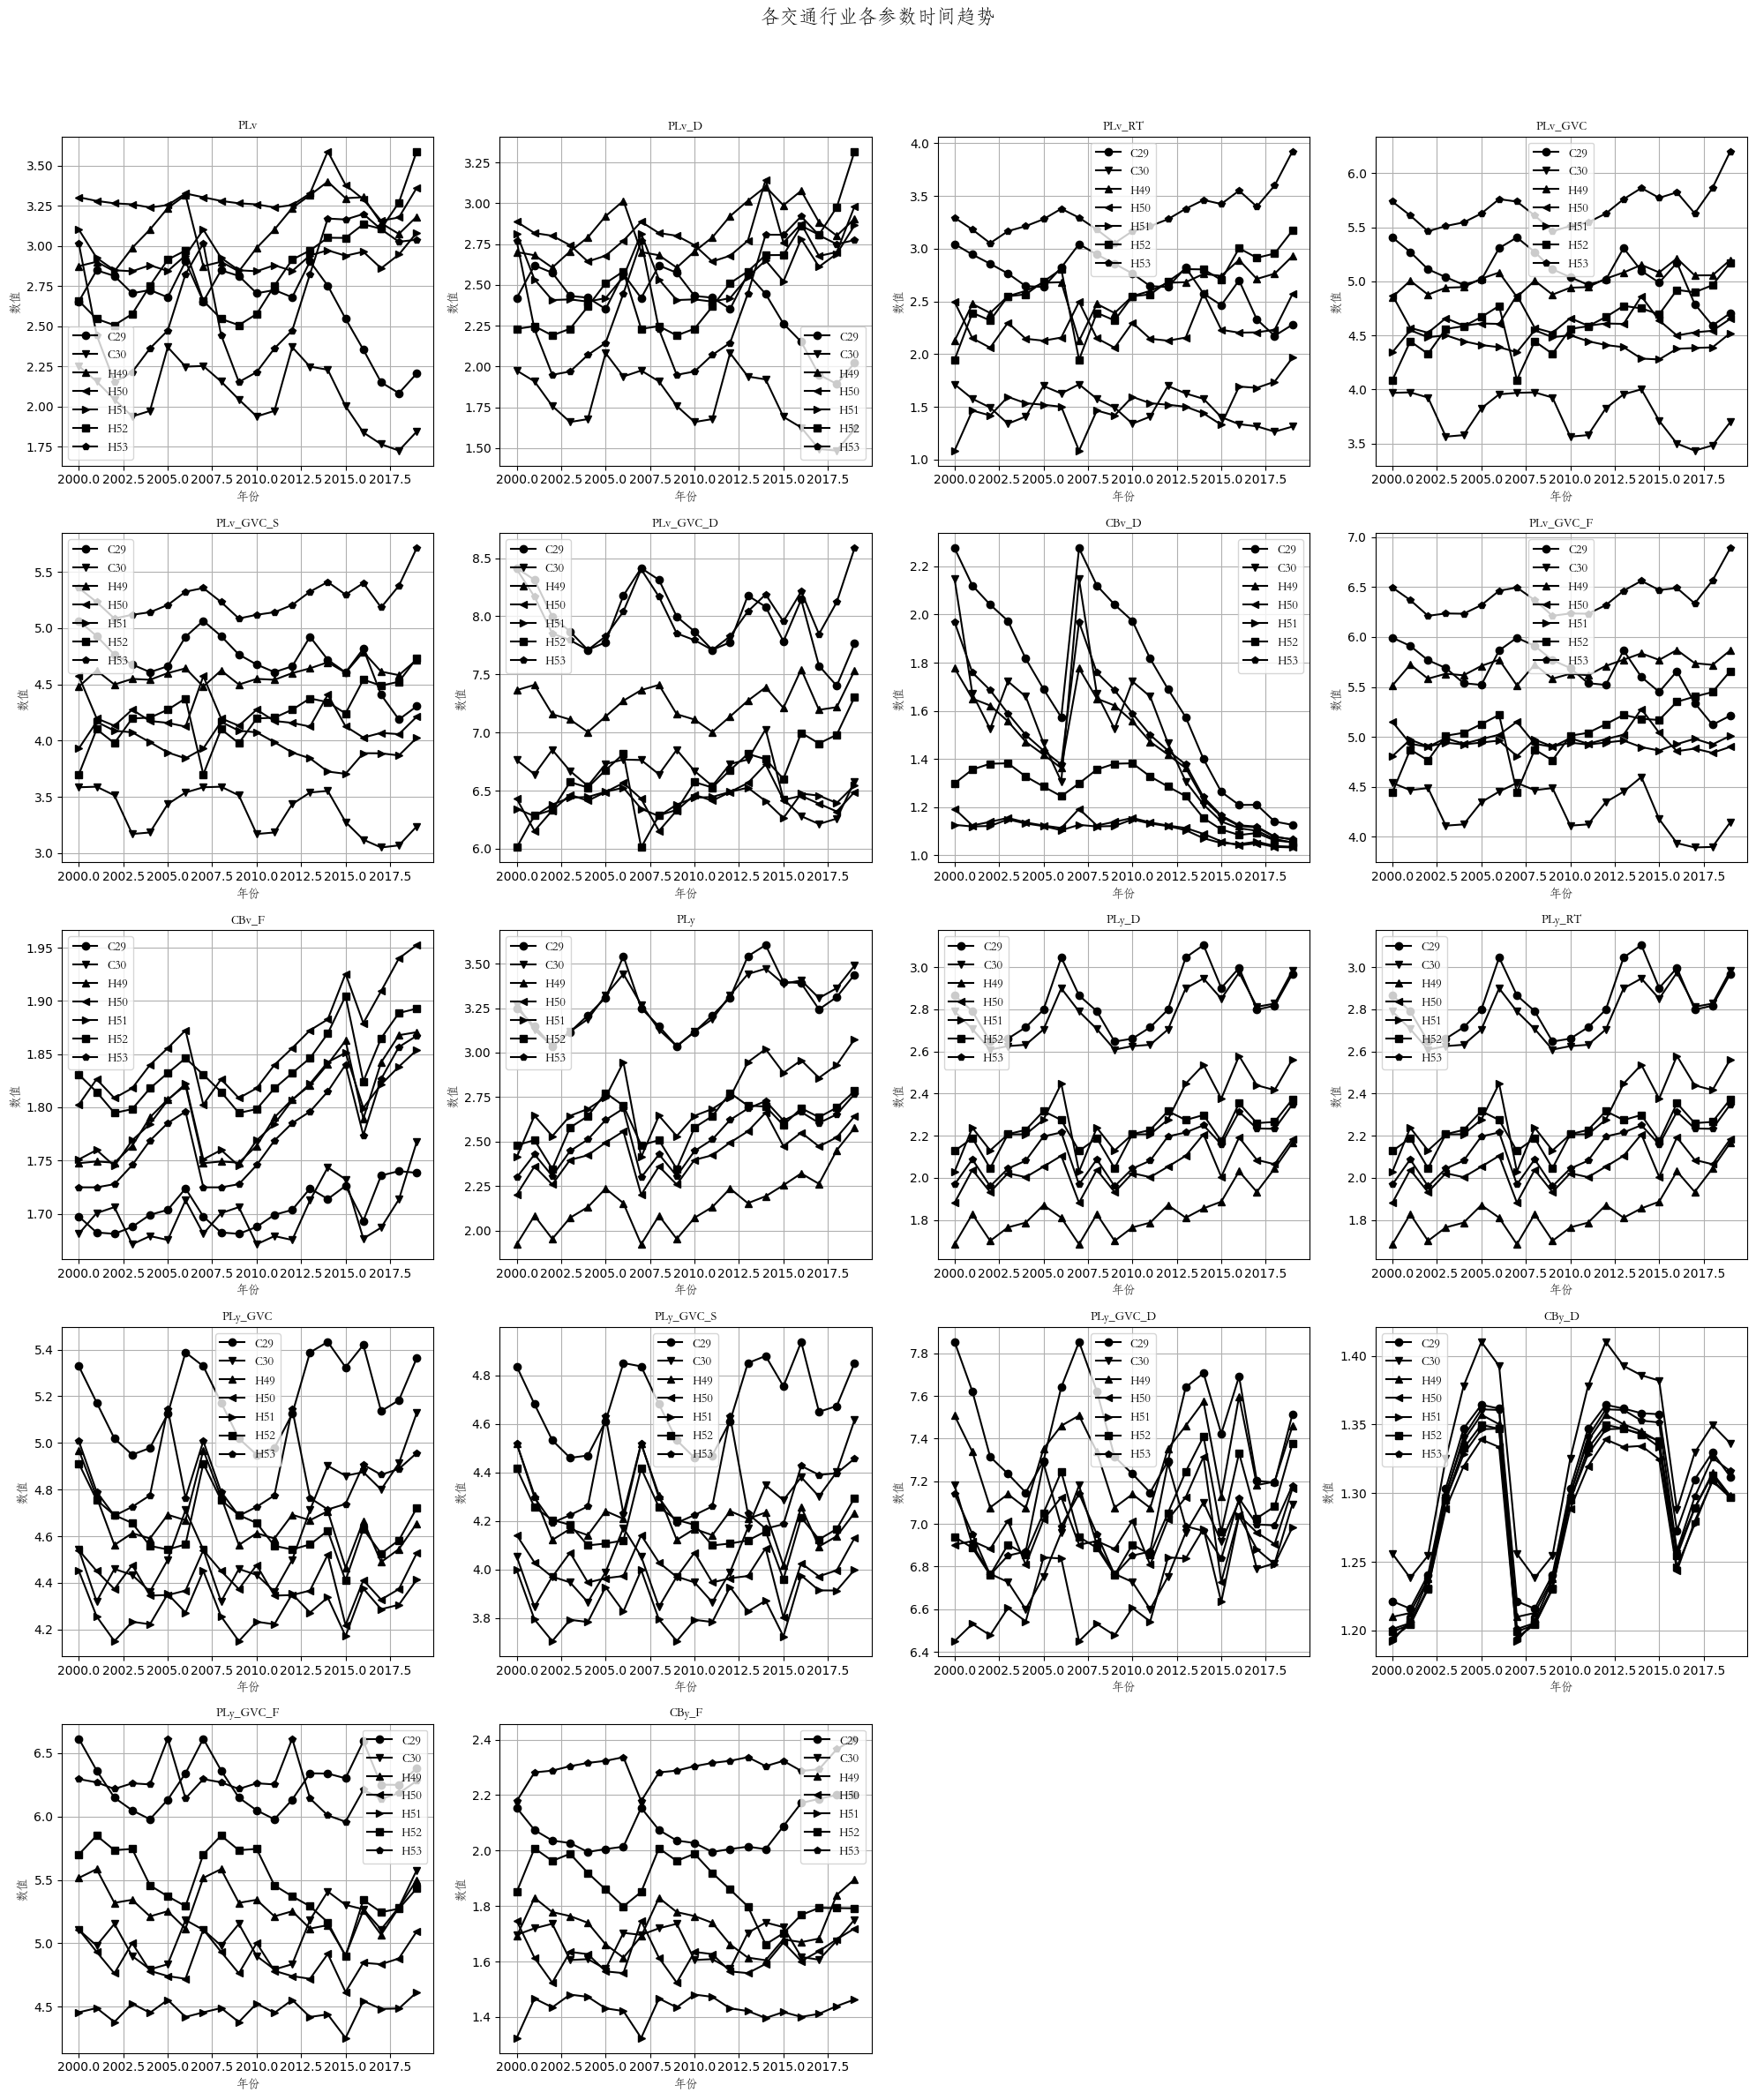

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pandas as pd
import numpy as np

# File paths
input_file_path = '/kaggle/input/upload-time-series-transportation/.xlsx'
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'
output_plot_path = '/kaggle/working/'

# Loading the data
data_selected_industries = pd.read_excel(input_file_path)

# Extracting unique parameters and industries
unique_parameters = data_selected_industries.columns[4:]
industries = data_selected_industries['Industry'].unique()

# Number of parameters to plot
num_params = len(unique_parameters)

# Calculate the number of rows needed for subplots (setting up 4 columns)
num_rows = int(np.ceil(num_params / 4))
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
fig.suptitle('各交通行业各参数时间趋势', fontsize=16, fontproperties=font_manager.FontProperties(fname=font_path))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Markers for different industries
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']

# Plotting all parameters as subplots in a single figure
for i, parameter in enumerate(unique_parameters):
    for industry, marker in zip(industries, markers[:len(industries)]):  # Ensuring we have enough markers
        # Filtering the industry data
        industry_data = data_selected_industries[data_selected_industries['Industry'] == industry]
        
        # Group data by Year and calculate the mean for the parameter
        mean_values = industry_data.groupby('Year')[parameter].mean()
        
        # Plotting on the appropriate subplot
        axes[i].plot(mean_values.index, mean_values, label=industry, marker=marker, color='black', linestyle='-')
        axes[i].set_title(parameter, fontproperties=font_manager.FontProperties(fname=font_path))
        axes[i].set_xlabel('年份', fontproperties=font_manager.FontProperties(fname=font_path))
        axes[i].set_ylabel('数值', fontproperties=font_manager.FontProperties(fname=font_path))
        axes[i].legend(prop=font_manager.FontProperties(fname=font_path))
        axes[i].grid(True)

# If there are any leftover axes, turn them off
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure to the specified output path
fig.savefig(output_plot_path + '行业各分解参数趋势.png', bbox_inches='tight')

# The figure is saved and can be found in the output directory
print(output_plot_path + '行业各分解参数趋势.png')


/kaggle/working/行业各分解参数趋势.png


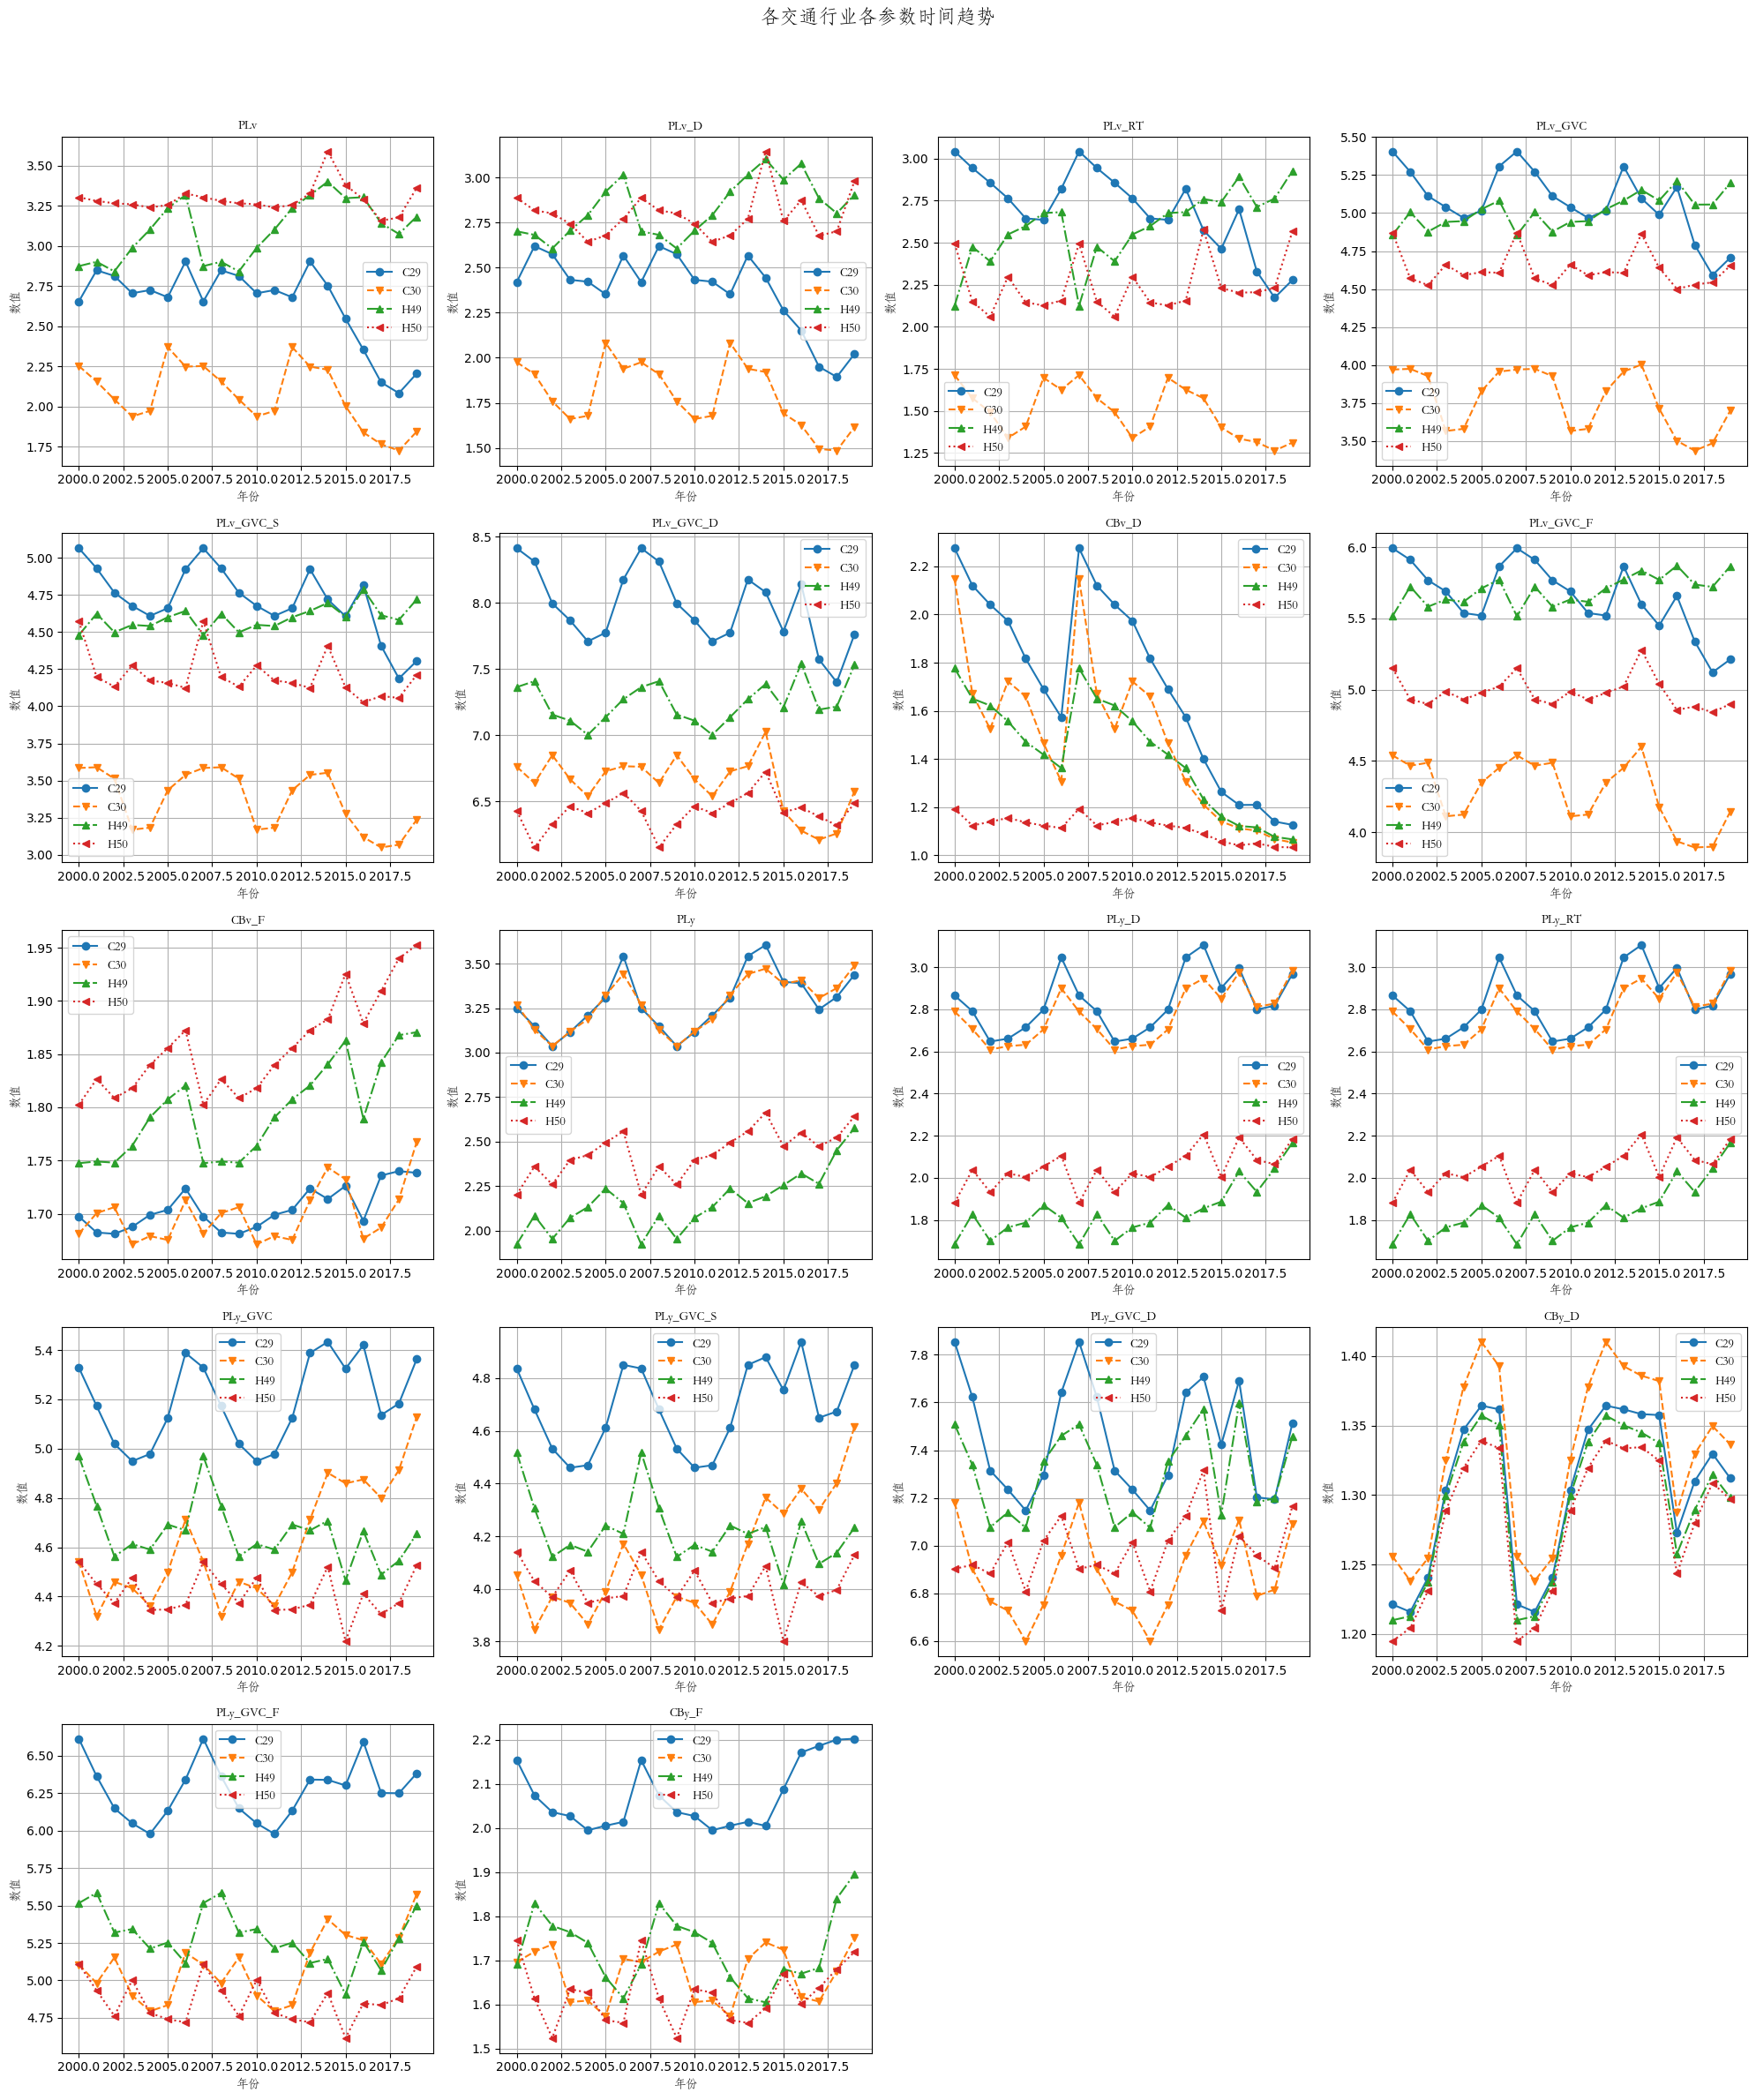

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import pandas as pd
import numpy as np

# File paths
input_file_path = '/kaggle/input/upload-time-series-transportation/.xlsx'
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'
output_plot_path = '/kaggle/working/'

# Loading the data
data_selected_industries = pd.read_excel(input_file_path)

# Extracting unique parameters and industries
unique_parameters = data_selected_industries.columns[4:]
industries = data_selected_industries['Industry'].unique()

# Number of parameters to plot
num_params = len(unique_parameters)

# Calculate the number of rows needed for subplots (setting up 4 columns)
num_rows = int(np.ceil(num_params / 4))
fig, axes = plt.subplots(num_rows, 4, figsize=(20, num_rows * 5))
fig.suptitle('各交通行业各参数时间趋势', fontsize=16, fontproperties=font_manager.FontProperties(fname=font_path))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Markers for different industries
markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'H', '+', 'x', 'D', 'd', '|', '_']

# Line styles for different industries
line_styles = ['-', '--', '-.', ':']

# Plotting all parameters as subplots in a single figure
for i, parameter in enumerate(unique_parameters):
    for industry, (marker, line_style) in zip(industries, zip(markers, line_styles)):  # Pairing markers with line styles
        # Filtering the industry data
        industry_data = data_selected_industries[data_selected_industries['Industry'] == industry]
        
        # Group data by Year and calculate the mean for the parameter
        mean_values = industry_data.groupby('Year')[parameter].mean()
        
        # Plotting on the appropriate subplot
        axes[i].plot(mean_values.index, mean_values, label=industry, marker=marker, linestyle=line_style)
        axes[i].set_title(parameter, fontproperties=font_manager.FontProperties(fname=font_path))
        axes[i].set_xlabel('年份', fontproperties=font_manager.FontProperties(fname=font_path))
        axes[i].set_ylabel('数值', fontproperties=font_manager.FontProperties(fname=font_path))
        axes[i].legend(prop=font_manager.FontProperties(fname=font_path))
        axes[i].grid(True)

# If there are any leftover axes, turn them off
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Save the figure to the specified output path
fig.savefig(output_plot_path + '行业各分解参数趋势.png', bbox_inches='tight')

# The figure is saved and can be found in the output directory
print(output_plot_path + '行业各分解参数趋势.png')


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import matplotlib.font_manager as fm

# File paths
input_file_path = '/kaggle/input/uploadchinavsglobal/VS_yearly.xlsx'
output_plot_path = '/kaggle/working/'
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'

# Load the Excel file
df_comparison = pd.read_excel(input_file_path)

# Load and set the font
prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = prop.get_name()

# Function to create radar charts
def plot_radar_charts_subplot_years(df, industries, years, rows, cols):
    plt.figure(figsize=(15, 1.5 * len(years)))

    for j, year in enumerate(years):
        for i, industry in enumerate(industries, 1):
            ax = plt.subplot(len(years), len(industries), (j * len(industries)) + i, polar=True)
            df_industry_year = df[(df['Industry_Combined'].str.contains(industry)) & (df['年份'] == year)]
            if df_industry_year.empty:
                continue

            categories = ['PLv_D', 'PLv_RT', 'PLv_GVC', 'PLy_D', 'PLy_RT', 'PLy_GVC']
            values_china = df_industry_year[[cat + '_rank_CHN' for cat in categories]].mean().values.tolist()
            values_global = df_industry_year[[cat + '_rank_Global_Avg' for cat in categories]].mean().values.tolist()
            values_china += values_china[:1]
            values_global += values_global[:1]
            angles = [n / float(len(categories)) * 2 * pi for n in range(len(categories))]
            angles += angles[:1]

            ax.plot(angles, values_china, linewidth=2, linestyle='solid', label='China', color='black')
            ax.fill(angles, values_china, 'black', alpha=0.3)
            ax.plot(angles, values_global, linewidth=2, linestyle='dashed', label='Global Avg', color='grey')
            ax.fill(angles, values_global, 'grey', alpha=0.3)

            plt.xticks(angles[:-1], categories, color='black', size=8, fontproperties=prop)
            plt.title(f'{industry} - {year}', size=10, color='black', y=1.1, fontproperties=prop)

#     plt.tight_layout(pad=1.0, h_pad=0.5)
    plt.tight_layout(pad=0.4, h_pad=0.6)

    plt.savefig(f'{output_plot_path}分解后的中国VS世界价值链比较.png')

# Specified industries and years
ordered_industries = ['C29', 'C30', 'H49', 'H50', 'H51', 'H52', 'H53']
# selected_years_new = [2000, 2006, 2012, 2019]
selected_years_new = [2000, 2005, 2010,2015,2019]


# Generating and saving the radar charts
plot_radar_charts_subplot_years(df_comparison, ordered_industries, selected_years_new, len(ordered_industries), 1)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# File paths
input_file_path = '/kaggle/input/chinavscountry/.xlsx'  # Update with the correct file name
output_plot_path = '/kaggle/working/average_distance_plot.png'
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'

# Load the Excel file from the second sheet
df = pd.read_excel(input_file_path, sheet_name=1)

# Load the custom font
prop = fm.FontProperties(fname=font_path)

# Create the plot with larger markers and black lines
plt.figure(figsize=(12, 6))
markers = ['o', '^', 's', 'p', '*', 'D', 'X']
marker_size = 8

for (continent, marker) in zip(df.columns[1:], markers):  # Skipping the first column which is likely 'Year'
    plt.plot(df['Year'], df[continent], label=continent, color='black', marker=marker, markersize=marker_size)

# Setting titles and labels with the custom font
plt.title('中国 (CHN) 到各大洲的平均距离', fontproperties=prop)
plt.xlabel('年份', fontproperties=prop)
plt.ylabel('平均距离', fontproperties=prop)
plt.legend(prop=prop)
plt.grid(True, alpha=0.5)  # Semi-transparency for the grid

# Save the plot with semi-transparency
plt.savefig(output_plot_path, transparent=True)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# File paths
input_file_path = '/kaggle/input/chinavscountry/.xlsx'  # Update with the correct file name
output_plot_path = '/kaggle/working/中国 (CHN) 到各大洲的平均距离.png'
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'

# Load the Excel file from the second sheet
df = pd.read_excel(input_file_path, sheet_name=1)

# Removing '其他' (Others) from the data
df = df.drop(columns=['其他'], errors='ignore')

# Load the custom font
prop = fm.FontProperties(fname=font_path)

# Create the plot with black lines only
plt.figure(figsize=(15, 8))
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':']  # Different line styles for distinction
markers = ['o', '^', 's', 'p', '*', 'D', 'X']  # Markers for each line

# Plot data for each continent
for (continent, line_style, marker) in zip(df.columns[1:], line_styles, markers):
    plt.plot(df['Year'], df[continent], label=continent, color='black', marker=marker, linestyle=line_style, markersize=10)

plt.title('中国 (CHN) 到各大洲的平均距离', fontproperties=prop)
plt.xlabel('年份', fontproperties=prop)
plt.ylabel('平均距离', fontproperties=prop)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop=prop)
plt.grid(True, alpha=0.5)
plt.tight_layout()

# Save and show the plot
plt.savefig(output_plot_path, transparent=True)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# File paths
input_file_path = '/kaggle/input/chinavscountry/.xlsx'  # Update with the correct file name
output_plot_path = '/kaggle/working/average_distance_plot.png'
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'

# Load the Excel file from the second sheet
df = pd.read_excel(input_file_path, sheet_name=1)

# Removing '其他' (Others) from the data
df = df.drop(columns=['其他'], errors='ignore')

# Load the custom font
prop = fm.FontProperties(fname=font_path)

# Create the plot with black lines only
plt.figure(figsize=(15, 8))
line_styles = ['-', '--', '-.', ':', '-', '--', '-.', ':']  # Different line styles for distinction
markers = ['o', '^', 's', 'p', '*', 'D', 'X']  # Markers for each continent

# Plot data for each continent including China to China
for (continent, line_style, marker) in zip(df.columns[1:], line_styles, markers):
    plt.plot(df['Year'], df[continent], label=continent, color='black', marker=marker, linestyle=line_style, markersize=12)

plt.title('中国 (CHN) 到各大洲的平均距离', fontproperties=prop)
plt.xlabel('年份', fontproperties=prop)
plt.ylabel('平均距离', fontproperties=prop)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), prop=prop)
plt.grid(True, alpha=0.5)
plt.tight_layout()

# Save and show the plot
plt.savefig(output_plot_path, transparent=True)
plt.show()


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# File paths
input_file_path = '/kaggle/input/uploadindustrytocountry/upload.xlsx'
output_plot_path = '/kaggle/working/中国交通行业与大洲之间的前后向APL.png'
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'
prop = fm.FontProperties(fname=font_path)

# Loading the data from the first and second sheets
first_sheet_data = pd.read_excel(input_file_path, sheet_name=0)
second_sheet_data = pd.read_excel(input_file_path, sheet_name=2)

# Preparing the data (assuming the first 14 columns are industry metrics and the 18th column is continent)
industry_columns = first_sheet_data.columns[:14].tolist()
continent_column = first_sheet_data.columns[17]

# Grouping data by continent and calculating the average of all industry metrics for each sheet
visualization_data_first = first_sheet_data[industry_columns + [continent_column]]
average_industry_by_continent_first = visualization_data_first.groupby(continent_column).mean()

visualization_data_second = second_sheet_data[industry_columns + [continent_column]]
average_industry_by_continent_second = visualization_data_second.groupby(continent_column).mean()

# Creating two heatmap subplots with continents on the x-axis and industries on the y-axis
plt.figure(figsize=(20, 10))

# Subplot for the first sheet
plt.subplot(1, 2, 1)
sns.heatmap(average_industry_by_continent_first.transpose(), cmap='Greys', annot=True, fmt=".2f", 
            annot_kws={"size": 12},linewidths=.5)

plt.title('中国内外资交通行业与大洲之间的前向APL', fontproperties=prop)
plt.xlabel('大洲', fontproperties=prop)
plt.ylabel('行业', fontproperties=prop)
plt.xticks(fontproperties=prop)
plt.yticks(fontproperties=prop)
# Subplot for the second sheet
plt.subplot(1, 2, 2)
sns.heatmap(average_industry_by_continent_second.transpose(), cmap='Greys', annot=True, fmt=".2f", 
            annot_kws={"size": 12},linewidths=.5)
plt.title('中国内外资交通行业与大洲之间的后向APL', fontproperties=prop)
plt.xlabel('大洲', fontproperties=prop)
plt.ylabel('行业', fontproperties=prop)
plt.xticks(fontproperties=prop)
plt.yticks(fontproperties=prop)
# Adjust layout, save as transparent image, and show the plot
plt.tight_layout()
plt.savefig(output_plot_path, transparent=True)
plt.show()





In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Adjusting the file paths
input_file_path = '/kaggle/input/20002005201020152019industry2industry/20002005201020152019.xlsx'
output_plot_path = '/kaggle/working/2000-2019年部门到全球部门前向APL.png'
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'

# Load the Excel file
sheet1_kaggle = pd.read_excel(input_file_path, sheet_name=1)

# Filter for the selected industries and melt the dataframe
selected_industries_kaggle = ['CHN_C29', 'CHN_C30', 'CHN_H49', 'CHN_H50', 'CHN_H51', 'CHN_H52', 'CHN_H53']
filtered_sheet1_kaggle = sheet1_kaggle[sheet1_kaggle['交通行业'].isin(selected_industries_kaggle)]
melted_filtered_sheet1_kaggle = pd.melt(filtered_sheet1_kaggle, id_vars=['交通行业', 'year'], var_name='Industry', value_name='Value')

# Set up font properties
font_properties = FontProperties(fname=font_path)

# Plotting the subplots
fig, axes = plt.subplots(nrows=len(selected_industries_kaggle), ncols=1, figsize=(12, 6 * len(selected_industries_kaggle)))

# Line styles and markers for each year
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]  # Adding a fifth line style for the year 2019
markers = ['o', 's', '^', 'D', 'p']  # Adding a fifth marker for the year 2019

# Plotting each industry in a separate subplot
for i, industry in enumerate(selected_industries_kaggle):
    industry_data = melted_filtered_sheet1_kaggle[melted_filtered_sheet1_kaggle['交通行业'] == industry]
    unique_years = industry_data['year'].unique()

    # Create lineplot for the current industry
    for j, year in enumerate(unique_years):
        year_data = industry_data[industry_data['year'] == year]
        sns.lineplot(ax=axes[i], data=year_data, x='Industry', y='Value', label=year, 
                     linestyle=line_styles[j % len(line_styles)], marker=markers[j % len(markers)])

    axes[i].set_title(f'Parallel Coordinates Plot for {industry}', fontproperties=font_properties)
    axes[i].set_ylabel('Value', fontproperties=font_properties)
    axes[i].set_xlabel('Industry', fontproperties=font_properties)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', prop=font_properties)

plt.tight_layout()

# Save the plot to the specified output path
plt.savefig(output_plot_path)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Adjusting the file paths
input_file_path = '/kaggle/input/20002005201020152019industry2industry/20002005201020152019.xlsx'
output_plot_path = '/kaggle/working/2000-2019年部门到中国各部门前向APL.png'
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'

# Load the Excel file
sheet1_kaggle = pd.read_excel(input_file_path, sheet_name=3)

# Filter for the selected industries and melt the dataframe
selected_industries_kaggle = ['CHN_C29', 'CHN_C30', 'CHN_H49', 'CHN_H50', 'CHN_H51', 'CHN_H52', 'CHN_H53']
filtered_sheet1_kaggle = sheet1_kaggle[sheet1_kaggle['交通行业'].isin(selected_industries_kaggle)]
melted_filtered_sheet1_kaggle = pd.melt(filtered_sheet1_kaggle, id_vars=['交通行业', 'year'], var_name='Industry', value_name='Value')

# Set up font properties
font_properties = FontProperties(fname=font_path)

# Plotting the subplots
fig, axes = plt.subplots(nrows=len(selected_industries_kaggle), ncols=1, figsize=(12, 6 * len(selected_industries_kaggle)))

# Line styles and markers for each year
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]  # Adding a fifth line style for the year 2019
markers = ['o', 's', '^', 'D', 'p']  # Adding a fifth marker for the year 2019

# Plotting each industry in a separate subplot
for i, industry in enumerate(selected_industries_kaggle):
    industry_data = melted_filtered_sheet1_kaggle[melted_filtered_sheet1_kaggle['交通行业'] == industry]
    unique_years = industry_data['year'].unique()

    # Create lineplot for the current industry
    for j, year in enumerate(unique_years):
        year_data = industry_data[industry_data['year'] == year]
        sns.lineplot(ax=axes[i], data=year_data, x='Industry', y='Value', label=year, 
                     linestyle=line_styles[j % len(line_styles)], marker=markers[j % len(markers)])

    axes[i].set_title(f'Parallel Coordinates Plot for {industry}', fontproperties=font_properties)
    axes[i].set_ylabel('Value', fontproperties=font_properties)
    axes[i].set_xlabel('Industry', fontproperties=font_properties)
    axes[i].tick_params(axis='x', rotation=90)
    axes[i].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left', prop=font_properties)

plt.tight_layout()

# Save the plot to the specified output path
plt.savefig(output_plot_path)
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# Setting the file paths for Kaggle environment
input_file_path = '/kaggle/input/20002005201020152019industry2industry/20002005201020152019.xlsx'
output_plot_path = '/kaggle/working/中国交通部门到全球各部门前向APL（2000、2005、2010、2015、2019五个年份平均）.png'
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'

# Read the Excel file
sheet1_kaggle = pd.read_excel(input_file_path, sheet_name=0)

# Filter for the selected industries and melt the dataframe
selected_industries_kaggle = ['CHN_C29', 'CHN_C30', 'CHN_H49', 'CHN_H50', 'CHN_H51', 'CHN_H52', 'CHN_H53']
filtered_sheet1_kaggle = sheet1_kaggle[sheet1_kaggle['交通行业'].isin(selected_industries_kaggle)]
melted_filtered_sheet1_kaggle = pd.melt(filtered_sheet1_kaggle, id_vars=['交通行业', 'year'], var_name='Industry', value_name='Value')

# Grouping the data by '交通行业' and 'Industry', and calculating the mean
mean_values_kaggle = melted_filtered_sheet1_kaggle.groupby(['交通行业', 'Industry']).mean().reset_index()

# Set up font properties
font_properties = FontProperties(fname=font_path)

# Updated line styles for clarity
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]  # Adding a fifth line style for the year 2019
markers = ['o', 's', '^', '<', '>', 'p', '*']
plt.style.use('grayscale')  # Using grayscale style for black and white effect

# Plotting the combined plot with adjusted line styles and markers
plt.figure(figsize=(12, 6))

# Plotting each industry's mean values
for i, industry in enumerate(selected_industries_kaggle):
    industry_data = mean_values_kaggle[mean_values_kaggle['交通行业'] == industry]
    sns.lineplot(data=industry_data, x='Industry', y='Value', label=industry,
                 linestyle=line_styles[i % len(line_styles)], marker=markers[i % len(markers)])

plt.title('中国交通部门到全球各部门前向APL（2000、2005、2010、2015、2019五个年份平均）', fontproperties=font_properties)
plt.ylabel('历年均值', fontproperties=font_properties)
plt.xlabel('行业', fontproperties=font_properties)
plt.xticks(rotation=90, fontproperties=font_properties)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', prop=font_properties)
plt.tight_layout()
plt.grid(True, alpha=0.3)  # Semi-transparency for the grid

# Save the plot to the specified output path
plt.savefig(output_plot_path)
plt.show()

print("Plot saved to:", output_plot_path)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# Setting the file paths for Kaggle environment
input_file_path = '/kaggle/input/20002005201020152019industry2industry/20002005201020152019.xlsx'
output_plot_path = '/kaggle/working/中国交通部门到全球各部门后向APL（2000、2005、2010、2015、2019五个年份平均）.png'
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'

# Read the Excel file
sheet1_kaggle = pd.read_excel(input_file_path, sheet_name=1)

# Filter for the selected industries and melt the dataframe
selected_industries_kaggle = ['CHN_C29', 'CHN_C30', 'CHN_H49', 'CHN_H50', 'CHN_H51', 'CHN_H52', 'CHN_H53']
filtered_sheet1_kaggle = sheet1_kaggle[sheet1_kaggle['交通行业'].isin(selected_industries_kaggle)]
melted_filtered_sheet1_kaggle = pd.melt(filtered_sheet1_kaggle, id_vars=['交通行业', 'year'], var_name='Industry', value_name='Value')

# Grouping the data by '交通行业' and 'Industry', and calculating the mean
mean_values_kaggle = melted_filtered_sheet1_kaggle.groupby(['交通行业', 'Industry']).mean().reset_index()

# Set up font properties
font_properties = FontProperties(fname=font_path)

# Updated line styles for clarity
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]  # Adding a fifth line style for the year 2019
markers = ['o', 's', '^', '<', '>', 'p', '*']
plt.style.use('grayscale')  # Using grayscale style for black and white effect

# Plotting the combined plot with adjusted line styles and markers
plt.figure(figsize=(12, 6))

# Plotting each industry's mean values
for i, industry in enumerate(selected_industries_kaggle):
    industry_data = mean_values_kaggle[mean_values_kaggle['交通行业'] == industry]
    sns.lineplot(data=industry_data, x='Industry', y='Value', label=industry,
                 linestyle=line_styles[i % len(line_styles)], marker=markers[i % len(markers)])

plt.title('中国交通部门到全球各部门后向APL（2000、2005、2010、2015、2019五个年份平均）', fontproperties=font_properties)
plt.ylabel('历年均值', fontproperties=font_properties)
plt.xlabel('行业', fontproperties=font_properties)
plt.xticks(rotation=90, fontproperties=font_properties)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', prop=font_properties)
plt.tight_layout()
plt.grid(True, alpha=0.3)  # Semi-transparency for the grid

# Save the plot to the specified output path
plt.savefig(output_plot_path)
plt.show()

print("Plot saved to:", output_plot_path)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# Setting the file paths for Kaggle environment
input_file_path = '/kaggle/input/20002005201020152019industry2industry/20002005201020152019.xlsx'
output_plot_path = '/kaggle/working/中国交通部门到中国各部门前向APL（2000、2005、2010、2015、2019五个年份平均）.png'
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'

# Read the Excel file
sheet1_kaggle = pd.read_excel(input_file_path, sheet_name=2)

# Filter for the selected industries and melt the dataframe
selected_industries_kaggle = ['CHN_C29', 'CHN_C30', 'CHN_H49', 'CHN_H50', 'CHN_H51', 'CHN_H52', 'CHN_H53']
filtered_sheet1_kaggle = sheet1_kaggle[sheet1_kaggle['交通行业'].isin(selected_industries_kaggle)]
melted_filtered_sheet1_kaggle = pd.melt(filtered_sheet1_kaggle, id_vars=['交通行业', 'year'], var_name='Industry', value_name='Value')

# Grouping the data by '交通行业' and 'Industry', and calculating the mean
mean_values_kaggle = melted_filtered_sheet1_kaggle.groupby(['交通行业', 'Industry']).mean().reset_index()

# Set up font properties
font_properties = FontProperties(fname=font_path)

# Updated line styles for clarity
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]  # Adding a fifth line style for the year 2019
markers = ['o', 's', '^', '<', '>', 'p', '*']
plt.style.use('grayscale')  # Using grayscale style for black and white effect

# Plotting the combined plot with adjusted line styles and markers
plt.figure(figsize=(12, 6))

# Plotting each industry's mean values
for i, industry in enumerate(selected_industries_kaggle):
    industry_data = mean_values_kaggle[mean_values_kaggle['交通行业'] == industry]
    sns.lineplot(data=industry_data, x='Industry', y='Value', label=industry,
                 linestyle=line_styles[i % len(line_styles)], marker=markers[i % len(markers)])

plt.title('中国交通部门到中国各部门前向APL（2000、2005、2010、2015、2019五个年份平均）', fontproperties=font_properties)
plt.ylabel('历年均值', fontproperties=font_properties)
plt.xlabel('行业', fontproperties=font_properties)
plt.xticks(rotation=90, fontproperties=font_properties)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', prop=font_properties)
plt.tight_layout()
plt.grid(True, alpha=0.3)  # Semi-transparency for the grid

# Save the plot to the specified output path
plt.savefig(output_plot_path)
plt.show()

print("Plot saved to:", output_plot_path)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties

# Setting the file paths for Kaggle environment
input_file_path = '/kaggle/input/20002005201020152019industry2industry/20002005201020152019.xlsx'
output_plot_path = '/kaggle/working/中国交通部门到中国各部门后向APL（2000、2005、2010、2015、2019五个年份平均）.png'
font_path = '/kaggle/input/fstfangsofont/STFANGSO.ttf'

# Read the Excel file
sheet1_kaggle = pd.read_excel(input_file_path, sheet_name=3)

# Filter for the selected industries and melt the dataframe
selected_industries_kaggle = ['CHN_C29', 'CHN_C30', 'CHN_H49', 'CHN_H50', 'CHN_H51', 'CHN_H52', 'CHN_H53']
filtered_sheet1_kaggle = sheet1_kaggle[sheet1_kaggle['交通行业'].isin(selected_industries_kaggle)]
melted_filtered_sheet1_kaggle = pd.melt(filtered_sheet1_kaggle, id_vars=['交通行业', 'year'], var_name='Industry', value_name='Value')

# Grouping the data by '交通行业' and 'Industry', and calculating the mean
mean_values_kaggle = melted_filtered_sheet1_kaggle.groupby(['交通行业', 'Industry']).mean().reset_index()

# Set up font properties
font_properties = FontProperties(fname=font_path)

# Updated line styles for clarity
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1))]  # Adding a fifth line style for the year 2019
markers = ['o', 's', '^', '<', '>', 'p', '*']
plt.style.use('grayscale')  # Using grayscale style for black and white effect

# Plotting the combined plot with adjusted line styles and markers
plt.figure(figsize=(12, 6))

# Plotting each industry's mean values
for i, industry in enumerate(selected_industries_kaggle):
    industry_data = mean_values_kaggle[mean_values_kaggle['交通行业'] == industry]
    sns.lineplot(data=industry_data, x='Industry', y='Value', label=industry,
                 linestyle=line_styles[i % len(line_styles)], marker=markers[i % len(markers)])

plt.title('中国交通部门到中国各部门后向APL（2000、2005、2010、2015、2019五个年份平均）', fontproperties=font_properties)
plt.ylabel('历年均值', fontproperties=font_properties)
plt.xlabel('行业', fontproperties=font_properties)
plt.xticks(rotation=90, fontproperties=font_properties)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left', prop=font_properties)
plt.tight_layout()
plt.grid(True, alpha=0.3)  # Semi-transparency for the grid

# Save the plot to the specified output path
plt.savefig(output_plot_path)
plt.show()

print("Plot saved to:", output_plot_path)
